In [374]:
import pandas as pd
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
#df_emotion_and_LIWC = pd.read_csv("LIWC_and_emotions.csv")

In [270]:
#df_time_adj = pd.read_csv("LIWC2015 Results (previous_reviews.csv).csv")
#df_time_adj.rename(columns={'K':'originalRevID','A': 'date', 'B': 'reviewID', 'C':'reviewerID', 'D': 'review', 'E': 'rating', 'F':'usefulCount', 'G':'coolCount','H':'funnyCount', 'I': 'flagged','J': 'restaurantID'}, inplace=True)
#df_time_adj=df_time_adj.drop(0)

In [319]:
df_emotion[df_emotion["reviewID"]=="*=*"]

,date,reviewID,reviewerID,review,rating,flagged,restaurantID,WC,Analytic,Clout,...,we,you,shehe,they,ipron,sadness,anger,disgust,joy,fear


In [317]:
df_emotion

,date,reviewID,reviewerID,review,rating,flagged,restaurantID,WC,Analytic,Clout,...,we,you,shehe,they,ipron,sadness,anger,disgust,joy,fear
0,2/29/2012,5Gd-c6dFwGP2S,jI5mX0tNR79J_qoFKZMPdA,Went here last night for the All-You-Can-Eat K...,3,N,50gFzdVglOz88eFJ6v-26A,143,70.81,85.29,...,3.50,1.40,0.00,2.80,3.50,0.205809,0.100131,0.133662,0.649434,0.110745
1,1/23/2009,Ft2qMRkzlY5XRG59-yp75g,--wLozIyZ3VXKsJAsHPiAQ,Probably the best Cantonese in Chicago. Especi...,5,Y,KomhK0JD5cleEW55YTw7MQ,78,90.53,55.09,...,0.00,0.00,0.00,0.00,6.41,0.338131,0.102607,0.009199,0.544103,0.024086
2,11/4/2009,0nPh0mh7BFNjbRX8NqMRCA,4JqFihhsOfemB7_HiuJoiw,In the city that perfected pizza - Pequod's is...,5,N,DXwSYgiXqIVNdO9dazel6w,150,70.69,47.33,...,2.67,0.00,0.00,1.33,3.33,0.156739,0.098465,0.054035,0.716935,0.077255
3,9/18/2012,1Wgraz90L5J78jFCihkpXw,L3uiUHTr2YJnuzrA--lWUw,"We were in Chicago at the end of August, visit...",1,Y,AqgG-1aD6JYj9D6OmBWO3w,580,30.03,54.13,...,4.83,0.52,0.86,1.21,6.55,0.558402,0.151286,0.143216,0.538704,0.105237
4,2/24/2009,OW6NhK-NlcGPGVP0kGxaRw,xiJ-p-jSQRiTjxr_gzAptA,Fogo charges half-price if you go for lunch on...,5,N,43rd1LKcZRIunySzbMsyLQ,37,70.25,50.00,...,0.00,5.41,0.00,0.00,0.00,0.335194,0.208685,0.135891,0.355640,0.057319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16405,5/4/2010,vwBJwQLYGumSvpe_cxxY1A,FtiocxJuP_RebtIqotRrpg,This place was incredible.. EXCELLENT service....,5,Y,_UJ3KqtHIHjExbAg-iIGUA,41,3.52,83.54,...,7.32,0.00,0.00,0.00,9.76,0.473392,0.053337,0.057628,0.708207,0.092933
16406,1/23/2012,SlXcVK7nM9MnHNNsAxMuVQ,XFaqJEtnK4DMk5x-Ag0Ivw,Wow.. I cannot get over how great this meal wa...,5,N,boE4Ahsssqic7o5wQLI04w,595,55.56,47.98,...,2.69,0.17,0.34,1.01,7.06,0.518766,0.122760,0.109144,0.631525,0.102664
16407,5/10/2010,7aAqvADp2FlbvY3OJ3I9OQ,BgPMUkC8LlLl1fc17RvUog,"So, it's nearly impossible for me to write a c...",3,Y,n-mj6IJkWyCu4BuD2dvm0A,176,56.25,41.03,...,2.27,0.00,1.14,0.00,5.68,0.585019,0.593745,0.497132,0.545144,0.118086
16408,4/26/2011,SE2FMna-lOTS8lUy8eCKDQ,KXWr9Ai0iM_qIkuGzh7ebQ,The first thing I noticed as the revolving doo...,4,N,vvhfPV-Llkd4fE2SHuLVvA,686,66.80,65.32,...,3.21,1.31,0.44,0.29,6.27,0.568985,0.168287,0.096081,0.574690,0.142267


In [323]:
############### Making a balanced dataframe #################
random.seed(1)

df_emotion = pd.read_csv("/Users/jamesfyfe/summer vac misc/data_files/LIWC_and_emotions.csv")
#df_LIWC = pd.read_csv("LIWC2015 Results (previous_reviews.csv).csv")
df_time_adj  = pd.read_csv("/Users/jamesfyfe/Downloads/time_adjusted_LIWC_and_emotions.csv")
#df_emotion_and_LIWC = pd.merge()

#pos = (df_emotion[df_emotion["flagged"]=="Y"])
#neg= (df_emotion[df_emotion["flagged"]=="N"])
#df_neg_only = neg.sample(n=len(pos), random_state =1)
#df_pos_only = pos.sample(n=1500, random_state =1)
#pd.merge(df_time_adj,df_emotion, left_on='originalRevID', right_on='reviewID')


#df_emotion = pd.concat([df_neg_only, pos])
#df_LIWC.info()
df_time_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29105 entries, 0 to 29104
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewID       29104 non-null  object 
 1   sadness        29105 non-null  float64
 2   anger          29105 non-null  float64
 3   disgust        29105 non-null  float64
 4   joy            29105 non-null  float64
 5   fear           29105 non-null  float64
 6   date           29105 non-null  object 
 7   reviewerID     29105 non-null  object 
 8   review         29105 non-null  object 
 9   rating         29105 non-null  int64  
 10  usefulCount    29105 non-null  int64  
 11  coolCount      29105 non-null  int64  
 12  funnyCount     29105 non-null  int64  
 13  flagged        29105 non-null  object 
 14  restaurantID   29105 non-null  object 
 15  originalRevID  29105 non-null  object 
 16  WC             29105 non-null  int64  
 17  Analytic       29105 non-null  float64
 18  Clout 

In [324]:
len(df_time_adj["originalRevID"].unique())

2994

In [325]:
df_6 = pd.read_csv("/Users/jamesfyfe/summer vac misc/data_files/missing_6_time_adjusted.csv")

In [329]:
df_time_adj = pd.concat([df_time_adj,df_6])

In [305]:
#df_time_adj=df_time_adj.sort_values(["originalRevID","date"], ascending=False).groupby("originalRevID").head(5)


In [330]:
df_time_adj.rename(columns={'anger_y':'anger_LIWC', "sadness":"priorSadness","anger":"priorAnger",
                        "fear":"priorFear","disgust":"priorDisgust",
                        "joy":"priorJoy"}, inplace=True)

df_temp = df_time_adj.drop(columns=["flagged","reviewerID","reviewID","restaurantID","review"])
df_temp.rename(columns={'originalRevID':'reviewID','anger':'anger_LIWC'}, inplace=True)

In [331]:
#df_temp = df_time_adj[["date", "reviewID","rating","Tone","Analytic","Clout","Authentic","WC"]]

df_temp.rating = df_temp.rating.astype(float)
df_time_adjusted_features = df_temp.groupby("reviewID").mean().reset_index()

In [332]:
df_time_adjusted_features.rename(columns={'rating': 'priorRating',
                                          'Tone': 'priorTone', 
                                          'Clout':'priorClout',
                                          'Analytic':'priorAnalytic', 
                                          'Authentic': 'priorAuthentic',
                                          'WC': 'priorWC',
                                          'i':'priorI',
                                          'we':'priorWe',
                                          'you':'priorYou',
                                          'shehe':'priorShehe',
                                          'ipron':'priorIpron',
                                          'they':'priorThey'}, inplace=True)


In [333]:
df_time_adjusted_features

,reviewID,priorSadness,priorAnger,priorDisgust,priorJoy,priorFear,priorRating,usefulCount,coolCount,funnyCount,...,see,hear,feel,swear,netspeak,assent,nonflu,filler,QMark,Exclam
0,--QF4qzucAMvIZdqZ0JKVQ,0.226750,0.068065,0.056272,0.726771,0.115080,4.7,3.7,3.6,3.1,...,0.964,0.152,0.651,0.000,0.284,0.597,0.304,0.0,0.407,2.922
1,--mQjYqqmsrZ77l4ML9kSQ,0.378294,0.206072,0.197177,0.611263,0.113200,3.1,1.6,0.6,0.4,...,0.555,0.521,0.434,0.087,0.280,0.434,0.124,0.0,0.359,0.645
2,--pWIKFVw4Srg6N3Tf3OWA,0.170929,0.214964,0.187451,0.618863,0.171355,3.8,2.7,0.8,0.8,...,0.280,0.480,0.413,0.317,0.542,0.382,0.180,0.0,1.254,5.669
3,-0LFRyeRHnPc79QajsdAYQ,0.429188,0.168044,0.137429,0.630956,0.161908,3.9,1.4,0.7,0.8,...,0.470,0.198,0.487,0.068,0.325,0.132,0.146,0.0,0.173,0.735
4,-1GkfvA3SZzjcz64ciJP5A,0.325555,0.196050,0.146748,0.663817,0.143756,3.8,0.6,0.4,0.2,...,0.567,0.561,0.279,0.069,0.300,1.150,1.211,0.0,0.256,1.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,zoyuzpnZb2NdSG2vX0ZZTw,0.293546,0.109557,0.105876,0.660975,0.069735,4.0,0.5,0.5,0.4,...,0.791,1.222,0.275,0.000,0.851,0.165,0.236,0.0,0.338,1.078
2996,zppeGcfiICuJmP-xemHdkg,0.330580,0.096667,0.117651,0.652643,0.117202,4.0,1.6,0.7,0.6,...,0.150,0.284,0.320,0.049,0.259,0.309,0.426,0.0,0.130,1.044
2997,zrqBKkDf9aV--0Dgc5VMBQ,0.205164,0.078323,0.055575,0.706760,0.102857,4.0,0.3,0.2,0.2,...,0.997,0.138,0.244,0.000,0.185,0.187,0.597,0.0,0.000,1.047
2998,zuO8jx5XE4eyDdFkZG,0.355288,0.084048,0.065083,0.676021,0.081574,3.6,1.5,1.2,0.9,...,0.702,0.313,0.959,0.506,0.372,0.333,0.362,0.0,0.327,0.957


In [334]:
df_base = df_emotion
#df_base

In [379]:
df_combined = pd.merge(df_time_adjusted_features,df_base, on="reviewID")

In [380]:
import sqlite3

def connect_db(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

conn = connect_db("/Users/jamesfyfe/summer vac misc/yelpResData.db")
cur = conn.cursor()


res_ids = tuple(df_combined["restaurantID"].unique())
query = "SELECT restaurantID,rating FROM restaurant WHERE restaurantID in {}".format(res_ids)
cur.execute(query)
res_ratings = cur.fetchall()

In [381]:
df_res = pd.DataFrame(res_ratings).rename(columns={1:"resRating",0:"restaurantID"})
df_combined = pd.merge(df_combined,df_res, on="restaurantID")

In [516]:
df_combined["ratingDiff"] = np.abs(df_combined["rating"] - df_combined["priorRating"])
df_combined["AnalyticDiff"] = np.abs(df_combined["Analytic"] - df_combined["priorAnalytic"])
df_combined["ToneDiff"] = np.abs(df_combined["Tone"] - df_combined["priorTone"])
df_combined["CloutDiff"] = np.abs(df_combined["Clout"] - df_combined["priorClout"])
df_combined["AuthenticDiff"] = np.abs(df_combined["Authentic"] - df_combined["priorAuthentic"])
df_combined["WCDiff"] = np.abs(df_combined["WC"] - df_combined["priorWC"])
df_combined["IDiff"] = np.abs(df_combined["i"] - df_combined["priorI"])
df_combined["WeDiff"] = np.abs(df_combined["we"] - df_combined["priorWe"])
df_combined["YouDiff"] = np.abs(df_combined["you"] - df_combined["priorYou"])
df_combined["SheheDiff"] = np.abs(df_combined["shehe"] - df_combined["priorShehe"])
df_combined["IpronDiff"] = np.abs(df_combined["ipron"] - df_combined["priorIpron"])
df_combined["TheyDiff"] = np.abs(df_combined["they"] - df_combined["priorThey"])
df_combined["AngerDiff"] = np.abs(df_combined["anger"] - df_combined["priorAnger"])
df_combined["DisgustDiff"] = np.abs(df_combined["disgust"] - df_combined["priorDisgust"])
df_combined["FearDiff"] = np.abs(df_combined["fear"] - df_combined["priorFear"])
df_combined["SadnessDiff"] = np.abs(df_combined["sadness"] - df_combined["priorSadness"])
df_combined["JoyDiff"] = np.abs(df_combined["joy"] - df_combined["priorJoy"])
df_combined["OriginalRatingDiff"] = np.abs(df_combined["rating"] - df_combined["resRating"])



####### with i/we/you etc #############
df_final=df_combined[["rating",
                         "Analytic","Tone","Clout","Authentic",
                         "WC",
                         "flagged",
                         "anger","disgust","sadness","fear","joy",
                         'i','we',"you","shehe","ipron", "they"]]
                         


####### with summary vars only #############
df_final=df_combined[["ratingDiff",
                      "AnalyticDiff","ToneDiff","CloutDiff","AuthenticDiff",
                      "WCDiff",
                         "flagged",
                         "AngerDiff","DisgustDiff","FearDiff","SadnessDiff","JoyDiff",
                         'IDiff','WeDiff',"YouDiff","SheheDiff","IpronDiff","TheyDiff"
                        ]]


#df_combined=df_combined.drop(columns="reviewID")

In [385]:
from sklearn.base import BaseEstimator, RegressorMixin

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
    def fit(self, X, y):
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit(disp=0)
    def predict(self, X):
        return self.results_.predict(X).round()


In [517]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def logit_regression(df_reg_emotion):
    le_emotion = preprocessing.LabelEncoder()
    df_reg_emotion["flagged"] = le_emotion.fit_transform(df_reg_emotion["flagged"])

    X = df_reg_emotion.drop(columns=["flagged"])
    X = sm.add_constant(X)
    Y = df_reg_emotion["flagged"]

    #scaler = StandardScaler()
    #X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1, shuffle=True, stratify=Y)

    model = sm.Logit(Y_train, X_train)
    result = model.fit()
    
    print("CV acc: "+str(np.mean(cross_val_score(SMWrapper(sm.Logit), X, Y, scoring='accuracy', cv=10))))
    print("CV f1: "+str(np.mean(cross_val_score(SMWrapper(sm.Logit), X, Y, scoring='f1', cv=10))))
    print("CV precision: "+str(np.mean(cross_val_score(SMWrapper(sm.Logit), X, Y, scoring='precision', cv=10))))
    print("CV recall: "+str(np.mean(cross_val_score(SMWrapper(sm.Logit), X, Y, scoring='recall', cv=10))))

    #print("\nTrain Accuracy: " + str(sum((result.predict(X_train) >= 0.5).astype(int) == Y_train)/len(Y_train)))
    #print("\nTest Accuracy: " + str(sum((result.predict(X_test) >= 0.5).astype(int) == Y_test)/len(Y_test)))
    print(result.summary())
    #print(classification_report(Y_test, (result.predict(X_test) >= 0.5).astype(int)))
    #cm = confusion_matrix(Y_test, (result.predict(X_test) >= 0.5).astype(int))


logit_regression(df_final)

Optimization terminated successfully.
         Current function value: 0.646243
         Iterations 5
CV acc: 0.6226666666666667
CV f1: 0.5970047093554228
CV precision: 0.6371323856921555
CV recall: 0.5632924196391695
                           Logit Regression Results                           
Dep. Variable:                flagged   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           17
Date:                Mon, 01 Mar 2021   Pseudo R-squ.:                 0.06767
Time:                        15:21:32   Log-Likelihood:                -1551.0
converged:                       True   LL-Null:                       -1663.6
Covariance Type:            nonrobust   LLR p-value:                 2.398e-38
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

## Stats summaries

In [504]:
feat = ["rating","ratingDiff",
        "Analytic", "AnalyticDiff",
        "Tone","ToneDiff",
        "Clout","CloutDiff",
        "Authentic" ,"AuthenticDiff",
        "WC","WCDiff",
        "flagged",
        "anger","AngerDiff",
        "disgust","DisgustDiff",
        "sadness","SadnessDiff",
        "fear","FearDiff",
        "joy","JoyDiff",
        'i', 'IDiff',
        'we','WeDiff',
        "you","YouDiff",
        "shehe","SheheDiff",
        "ipron", "IpronDiff",
        "they","TheyDiff"
                        ]
df_combined[feat].describe().T


In [512]:
df_summary = df_combined[feat].groupby("flagged").agg(["mean","std"]).reset_index()
df_summary.T.unstack()
#df_summary.T.unstack().to_csv("summary_stats.csv")

0                          1                
                    mean        std            mean        std     
rating             4.044    1.02572  NaN        3.8    1.37693  NaN
ratingDiff      0.824668   0.645887  NaN     1.1249   0.867739  NaN
Analytic         56.4942    23.7469  NaN    57.7282    25.8509  NaN
AnalyticDiff     20.2909    14.2575  NaN    22.1227    14.6498  NaN
Tone             82.6432    24.3585  NaN    80.9318    28.5292  NaN
ToneDiff         18.5922    16.9104  NaN     21.538    19.7583  NaN
Clout            46.6499    22.8902  NaN    51.8545     25.601  NaN
CloutDiff         19.538      13.47  NaN    22.1385    14.8959  NaN
Authentic        47.6178    27.9533  NaN    46.6863    30.8702  NaN
AuthenticDiff     24.299    15.9292  NaN    26.6863    16.1065  NaN
WC                146.46    122.647  NaN    102.501    99.0995  NaN
WCDiff           90.2402    86.1809  NaN    90.8268    71.3729  NaN
anger           0.125666   0.140153  NaN   0.120293   0.145464  NaN
AngerDiff      0.0934323   0.112302  NaN   0.102183    0.11038  NaN
disgust         0.117859   0.136553  NaN   0.109168   0.140865  NaN
DisgustDiff    0.0913556     0.1097  NaN  0.0960084   0.110038  NaN
sadness         0.286475   0.206363  NaN   0.249503   0.211246  NaN
SadnessDiff       0.1871   0.099293  NaN   0.198524   0.104735  NaN
fear           0.0877853   0.102555  NaN  0.0764477  0.0950688  NaN
FearDiff       0.0585768  0.0900241  NaN  0.0619212  0.0808342  NaN
joy             0.661661   0.150904  NaN   0.657898   0.208325  NaN
JoyDiff         0.105957   0.115535  NaN    0.15367   0.145546  NaN
i                4.35249     3.0524  NaN    3.97401    3.18523  NaN
IDiff            2.40287    2.12357  NaN    2.59798     1.9446  NaN
we               1.07737    1.59292  NaN    1.16553    1.98456  NaN
WeDiff           1.21972    1.05998  NaN    1.45761    1.38183  NaN
you              1.16415    1.65802  NaN    1.17709    1.90075  NaN
YouDiff          1.16148    1.21755  NaN    1.39292    1.40765  NaN
shehe           0.275673   0.722929  NaN     0.3501   0.950738  NaN
SheheDiff       0.425801   0.624941  NaN   0.517923   0.815937  NaN
ipron            4.84757    2.70733  NaN    4.69359    3.22461  NaN
IpronDiff        2.14434    1.81821  NaN    2.53488    2.19617  NaN
they            0.962833    1.39356  NaN    1.03003     1.5371  NaN
TheyDiff         1.03741    1.04645  NaN    1.13306    1.08203  NaN
flagged              NaN        NaN    N        NaN        NaN    Y

In [485]:
df_summary

flagged rating             Analytic                  Tone             \
            mean       std       mean        std       mean        std   
0       N  4.044  1.025719  56.494167  23.746862  82.643227  24.358482   
1       Y  3.800  1.376928  57.728227  25.850923  80.931827  28.529193   

      Clout             Authentic  ...    WeDiff             YouDiff  \
       mean        std       mean  ...      mean       std      mean   
0  46.64988  22.890201  47.617753  ...  1.219719  1.059976  1.161485   
1  51.85454  25.600980  46.686307  ...  1.457610  1.381833  1.392921   

            SheheDiff           IpronDiff            TheyDiff            
        std      mean       std      mean       std      mean       std  
0  1.217552  0.425801  0.624941  2.144338  1.818208  1.037412  1.046451  
1  1.407647  0.517923  0.815937  2.534877  2.196170  1.133058  1.082034  

[2 rows x 69 columns]

In [513]:
'''for j, i in enumerate(l1):
    Sp.loc[j, 'col1'] = i'''
df_t = pd.DataFrame()    
df_t["var"] = [n for n in feat if n != "flagged"]

df_t["t_stat"] = None
df_t["p_val"] = None
for col in [n for n in feat if n != "flagged"]:
    c1 = df_combined[df_combined["flagged"]=='Y'][col]
    c2 = df_combined[df_combined["flagged"]=='N'][col]
    tres = scipy.stats.ttest_ind(c1, c2, equal_var=False)
    df_t.loc[df_t["var"]==col,"t_stat"] =tres[0]
    df_t.loc[df_t["var"]==col,"p_val"] =np.round(tres[1],3)
    
   # df_t["p_val"] = tres[1]
   

In [515]:
df_t.to_csv("t_test_summary.csv")

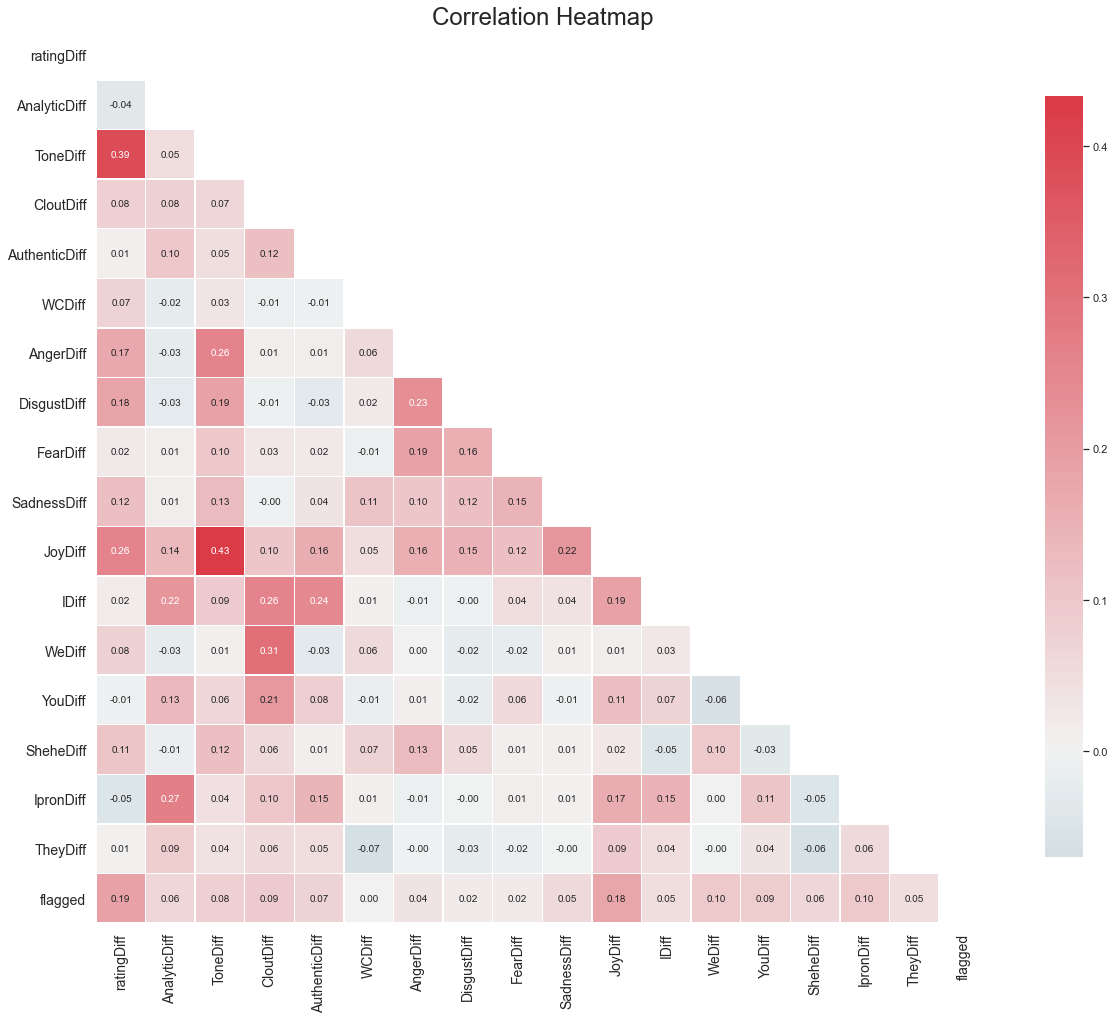

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(df_fs):
    sns.set(style="white")
    # Calculating Pearson's correlation coefficient of the subsetted data
    correlation = (pd.concat([df_fs.drop(columns=["flagged"]),df_fs["flagged"]], axis=1)).corr()
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20,20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlation, center=0, mask=mask,cmap=cmap,
                fmt='.2f', square=True, linewidths=.5, 
                annot=True, cbar_kws={"shrink": .70},  
                annot_kws={"size": 10})
    ax.set_title('Correlation Heatmap', fontsize = 24)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)

    
heatmap(df_final)

In [428]:
X = df_combined.drop(columns=["flagged"])
#X = sm.add_constant(X)
Y = df_combined["flagged"]

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1, shuffle=True, stratify=Y)
from sklearn.metrics import accuracy_score

#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 1, n_estimators=500)
#X = feature_selection(X_train,Y_train, 150)

rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
acc = accuracy_score(rf_predictions,Y_test)
acc

0.6517336606320957

In [262]:
cleaning_df = pd.read_csv("previous_reviews.csv")
cleaning_df
#cleaning_df.rename(columns={'K':'originalRevID','A': 'date', 'B': 'reviewID', 'C':'reviewerID', 'D': 'review', 'E': 'rating', 'F':'usefulCount', 'G':'coolCount','H':'funnyCount', 'I': 'flagged','J': 'restaurantID'}, inplace=True)
#cleaning_df=cleaning_df.drop(0)

#k=0
for i,row in cleaning_df.iterrows():
#    if (i==161517):
#        print(cleaning_df.at[i,"review"].replace('Â\xa0','').replace('Â\xa0',''))
    #cleaning_df.at[i,"review"] = cleaning_df.at[i,"review"].replace(cleaning_df.at[i,"review"],'Â\xa0','').replace('Â','')
    cleaning_df.at[i,"review"] = cleaning_df.at[i,"review"].replace('Â\xa0','').replace('Â\xa0','')

In [263]:
cleaning_df
#list(cleaning_df["review"])[0].replace('Â\xa0', '')

,date,reviewID,reviewerID,review,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID,originalRevID
0,2009-12-01,ctA2PdCJlF0KeCBsP,EM9qQxKzCbPONjOXbCCQBw,Cheap. Thats the only upside. After living in ...,2,2,0,2,N,tW2jfL-qMccAYZSghPBbHA,XTgVp0QkXUJUnqprblt-3w
1,2009-11-28,jwJTlc8qrBLpkYKt4CGmZg,Gxu8g6IDK5pbM_9ReT8Hmg,Amazing. The most perfect slice of deep dish I...,5,3,2,1,N,tW2jfL-qMccAYZSghPBbHA,XTgVp0QkXUJUnqprblt-3w
2,2009-11-22,1mKFAuJueo4cJ-o0cG3ssA,EQGNWIjSITjGXXWPCUGkDA,"Born and raised in Chicago, and god only knows...",4,0,1,0,N,tW2jfL-qMccAYZSghPBbHA,XTgVp0QkXUJUnqprblt-3w
3,2009-11-20,2J4AE24Wlu5XmeCLQP,MOhA6cDlZ5hRHLuA_WOaDQ,"Yes, Ive indeed tried a lot of pizza. Ive had ...",4,1,0,1,N,tW2jfL-qMccAYZSghPBbHA,XTgVp0QkXUJUnqprblt-3w
4,2009-11-14,OELXVjEu2pxNAuzLJ47hvA,7L2R2hs_VoT2rprrfizUHg,"Yum, I am always in a food coma after eating h...",4,0,0,1,N,tW2jfL-qMccAYZSghPBbHA,XTgVp0QkXUJUnqprblt-3w
...,...,...,...,...,...,...,...,...,...,...,...
161512,2010-02-23,R7zz2M6m0ID,Uy5WS3b2KVZd8lZK1KuEjA,"Very nice service, very accommodating, and a l...",4,2,0,0,N,N7juvW8YoFIj7sEBzVF8GQ,fSKwROK0raZ9ljsxArDmqQ
161513,2010-02-20,J7Qa-m-IGgkrjbPV,c75RjirUA_4wzl47TlZEJQ,Prepare yourself for some amazingly tasty food...,5,4,2,0,N,N7juvW8YoFIj7sEBzVF8GQ,fSKwROK0raZ9ljsxArDmqQ
161514,2010-02-17,HYOeh2hBwD2DK10MV7X1qw,31A0UI-fyZqHu1jxCnB1rg,You're simply the best...better than all the r...,5,1,0,0,N,N7juvW8YoFIj7sEBzVF8GQ,fSKwROK0raZ9ljsxArDmqQ
161515,2010-02-16,-ndgxV3RCKKgIqhhRCfkqQ,XsStxmyaOXC9oXNs9GaJEQ,BYOB! BYOB! BYOB! BYOB! We of course assumed t...,4,1,0,0,N,N7juvW8YoFIj7sEBzVF8GQ,fSKwROK0raZ9ljsxArDmqQ


In [264]:
#cleaning_df.to_csv('previous_reviews.csv', index=False)


In [61]:
df_emotion = pd.read_csv("time_adjusted_LIWC_and_emotions.csv")
#df_emotion

,reviewID,sadness,anger,disgust,joy,fear,date,reviewerID,review,rating,...,see,hear,feel,swear,netspeak,assent,nonflu,filler,QMark,Exclam
0,ctA2PdCJlF0KeCBsP,0.292643,0.112365,0.088567,0.261127,0.109580,2009-12-01,EM9qQxKzCbPONjOXbCCQBw,Cheap. Thats the only upside. After living in ...,2,...,0.00,0.00,0.00,0.0,3.45,0.00,0.00,0.0,0.00,0.00
1,jwJTlc8qrBLpkYKt4CGmZg,0.542694,0.076944,0.616414,0.662569,0.069506,2009-11-28,Gxu8g6IDK5pbM_9ReT8Hmg,Amazing. The most perfect slice of deep dish I...,5,...,0.90,0.00,0.90,0.0,0.00,0.00,0.90,0.0,0.00,0.00
2,1mKFAuJueo4cJ-o0cG3ssA,0.025798,0.022255,0.006346,0.939005,0.008607,2009-11-22,EQGNWIjSITjGXXWPCUGkDA,"Born and raised in Chicago, and god only knows...",4,...,0.00,0.00,0.00,0.0,1.67,0.00,0.00,0.0,0.00,1.67
3,2J4AE24Wlu5XmeCLQP,0.157338,0.047234,0.079734,0.621915,0.065345,2009-11-20,MOhA6cDlZ5hRHLuA_WOaDQ,"Yes, Ive indeed tried a lot of pizza. Ive had ...",4,...,1.35,1.35,0.00,0.0,0.00,2.03,0.00,0.0,0.68,0.00
4,OELXVjEu2pxNAuzLJ47hvA,0.104872,0.046039,0.041377,0.731628,0.034957,2009-11-14,7L2R2hs_VoT2rprrfizUHg,"Yum, I am always in a food coma after eating h...",4,...,0.00,0.00,3.45,0.0,0.00,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29100,LNtM0Zg7QFwBq6kuLUcqUg,0.165529,0.116166,0.057548,0.691710,0.067401,2009-12-04,BkZWHgKCwNc-9aJoLF0mUQ,"Warm it up, Kris...Im about to.... I have been...",4,...,1.33,0.00,1.33,0.0,0.00,0.00,0.67,0.0,0.00,0.00
29101,-2nm,0.425518,0.062322,0.073516,0.720362,0.068419,2009-11-20,AftFelF-uWV83h4nKTFawQ,This is not like Fogo or texas de brasil. It h...,3,...,0.78,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
29102,5PiI8LiADzTjpLzUClz93Q,0.089564,0.087011,0.420219,0.688732,0.086729,2009-11-20,OCTep1VhmZ05l6FpiVhuUg,"I love this place. As far as rooftop bars go, ...",4,...,1.48,0.74,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00
29103,Ux9W4Y7w18lOtlc5igdTig,0.484980,0.067052,0.441654,0.671243,0.079364,2009-11-16,QOm-8-jt181pIoYPfJXMeA,Zed 451 is a cool hip looking placed but if yo...,3,...,1.97,0.79,0.79,0.0,0.00,0.79,0.00,0.0,0.00,0.39


# Combined model

/Users/jamesfyfe/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/jamesfyfe/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Optimization terminated successfully.
         Current function value: 0.617924
         Iterations 5

Train Accuracy: 0.6584551148225469

Test Accuracy: 0.6510851419031719
                           Logit Regression Results                           
Dep. Variable:                flagged   No. Observations:                 2395
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           29
Date:                Mon, 01 Feb 2021   Pseudo R-squ.:                  0.1085
Time:                        20:53:20   Log-Likelihood:                -1479.9
converged:                       True   LL-Null:                       -1660.1
Covariance Type:            nonrobust   LLR p-value:                 7.575e-59
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                

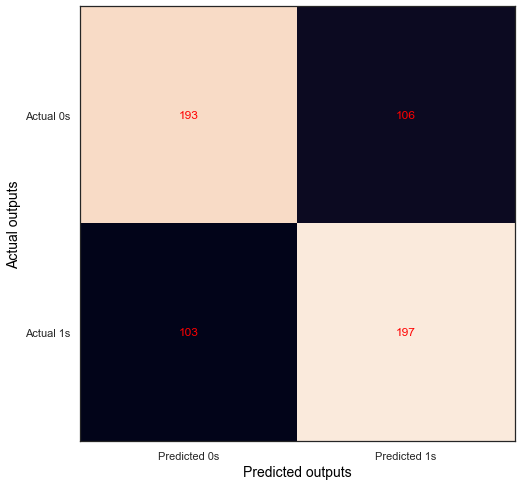

In [298]:
####### with summary vars only #############
df_final=df_combined[[#"ratingDiff",
                         "AnalyticDiff","ToneDiff","CloutDiff","AuthenticDiff","WCDiff",
                         "flagged",
                         'IDiff','WeDiff',"YouDiff","SheheDiff","IpronDiff","TheyDiff",
                         "Tone","Analytic","Clout","Authentic",
                         "AngerDiff","DisgustDiff","FearDiff","SadnessDiff","JoyDiff",
                         "WC", "rating","OriginalRatingDiff",
                         "i","we","you","shehe","ipron","they"
                       #  "anger","disgust","sadness","joy","fear"
                        ]]

df_final["OriginalRatingDiff"]=df_final["OriginalRatingDiff"]
logit_regression(df_final)